# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The data problem is identifying the factors that influence used car prices. This problem requires understanding the relationships between various vehicle attributes and their pricing, and it is set up to answer the broader business question about how to optimize pricing and inventory strategies. The data tasks are:
1. Collecting and preparing the relevant data.
2. Performing exploratory data analysis to uncover trends and patterns.
3. Engineering features that could be important in predicting car prices.
4. Selecting and training predictive models.
5. Evaluating these models to ensure they accurately predict used car prices.
6. Interpreting the model outputs to provide business insights.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

To get to know the dataset and identify any quality issues within it I would do the following:
1. Initial Data Inspection - Use commands like head(), info(), and describe() to get an overview of the data.
2. Data Quality Assessment - Check for missing values and outliers and decide how to handle them.
3. Visualization - Create histograms, box plots, and scatter plots to visualize distributions and relationships between variables.
4. Correlation Analysis - Analyze the relationships between different variables.
5. Feature Review - Consider if and how to transform given features for modeling or if new features should be constructed from the existing ones.

In [37]:
!pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.0 MB/s eta 0:00:00


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import category_encoders as ce

In [39]:
df = pd.read_csv('data/vehicles.csv', index_col=0)

In [40]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(14)
memo

In [42]:
df.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [43]:
df = df.dropna()

<Axes: title={'center': 'Vehicle Condition Bar Plot'}, xlabel='condition', ylabel='frequency'>

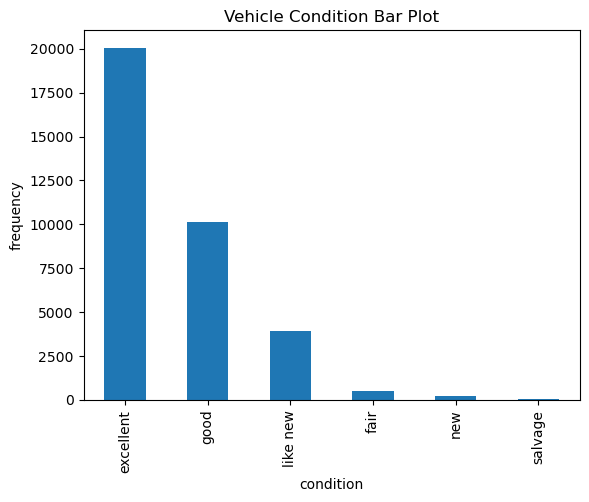

In [44]:
df['condition'].value_counts().plot(kind='bar', ylabel='frequency', title='Vehicle Condition Bar Plot')

<Axes: title={'center': 'Vehicle Size Bar Plot'}, xlabel='size', ylabel='frequency'>

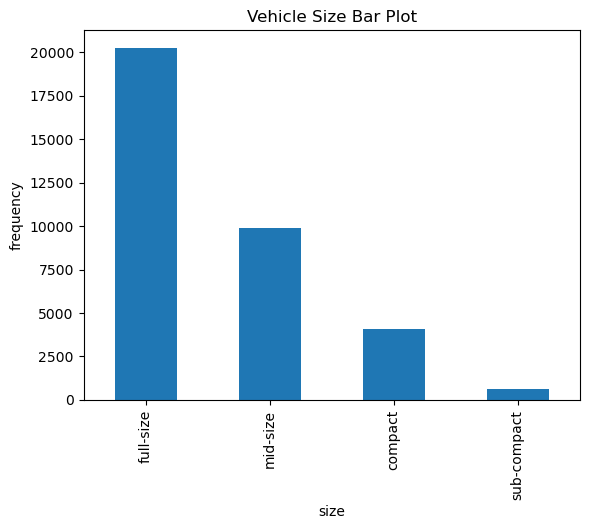

In [45]:
df['size'].value_counts().plot(kind='bar', ylabel='frequency', title='Vehicle Size Bar Plot')

<Axes: title={'center': 'Vehicle Manufacturer Bar Plot'}, xlabel='manufacturer', ylabel='frequency'>

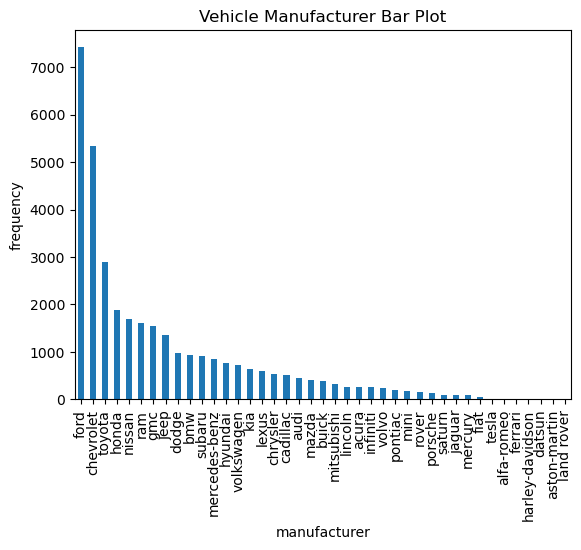

In [46]:
df['manufacturer'].value_counts().plot(kind='bar', ylabel='frequency', title='Vehicle Manufacturer Bar Plot')

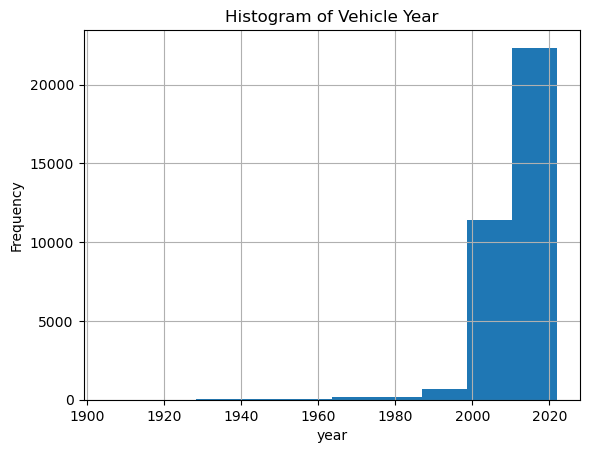

In [47]:
plt.figure()
df['year'].hist()
plt.title('Histogram of Vehicle Year')  
plt.xlabel('year')  
plt.ylabel('Frequency')  
plt.show()

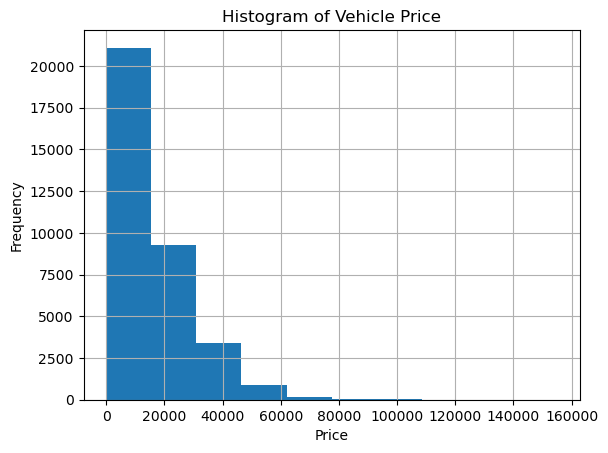

In [48]:
plt.figure()
df['price'].hist()
plt.title('Histogram of Vehicle Price')  
plt.xlabel('Price')  
plt.ylabel('Frequency') 
plt.show()

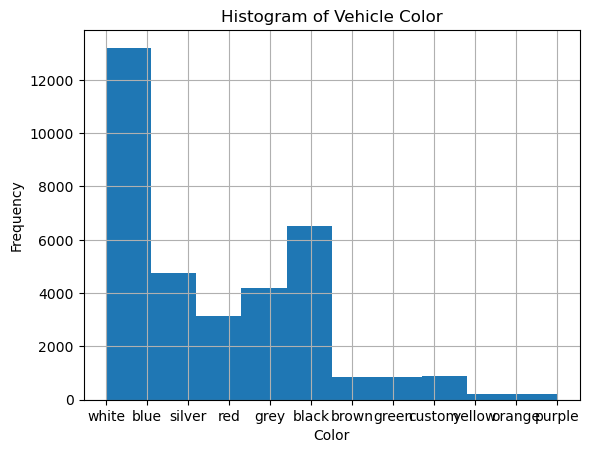

In [81]:
plt.figure()
df['paint_color'].hist()
plt.title('Histogram of Vehicle Color')  
plt.xlabel('Color')  
plt.ylabel('Frequency') 
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [49]:
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
numerical_features = ['year', 'odometer']
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [51]:
object_columns = df.select_dtypes(include=['object']).columns
categorical_features = object_columns
categorical_transformer = Pipeline(steps=[('target_encoder', ce.TargetEncoder(smoothing=1.0))])


In [52]:
transformer = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [53]:
linear_regression_model = Pipeline(steps=[('transformer', transformer),
                        ('regressor', LinearRegression())])

In [54]:
linear_regression_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('target_encoder',
                                                                   TargetEncoder(smoothing=1.0))]),
                                                  Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [55]:
y_pred = linear_regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 110505563.88718075
Root Mean Squared Error: 10512.162664608113


In [69]:
ridge_model = Pipeline(steps=[('transformer', transformer),
                        ('regressor', Ridge(alpha=1.0))])

In [71]:
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('target_encoder',
                                                                   TargetEncoder(smoothing=1.0))]),
                                                  Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object'))])),
                ('regressor', Ridge())])

In [58]:
ridge_y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, ridge_y_pred)
rmse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 110505148.72838965
Root Mean Squared Error: 10512.14291799677


In [59]:
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
}

In [60]:
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ......regressor__alpha=0.1;, score=-98082228.117 total time=   0.2s
[CV 2/5] END ......regressor__alpha=0.1;, score=-88249615.706 total time=   0.3s
[CV 3/5] END ......regressor__alpha=0.1;, score=-94176884.373 total time=   0.2s
[CV 4/5] END .....regressor__alpha=0.1;, score=-123151053.637 total time=   0.2s
[CV 5/5] END ......regressor__alpha=0.1;, score=-94438974.844 total time=   0.2s
[CV 1/5] END ......regressor__alpha=1.0;, score=-98082350.674 total time=   0.2s
[CV 2/5] END ......regressor__alpha=1.0;, score=-88249736.179 total time=   0.2s
[CV 3/5] END ......regressor__alpha=1.0;, score=-94177133.997 total time=   0.2s
[CV 4/5] END .....regressor__alpha=1.0;, score=-123148275.430 total time=   0.2s
[CV 5/5] END ......regressor__alpha=1.0;, score=-94439152.720 total time=   0.3s
[CV 1/5] END .....regressor__alpha=10.0;, score=-98083577.246 total time=   0.2s
[CV 2/5] END .....regressor__alpha=10.0;, score=-

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('target_encoder',
                                                                                          TargetEncoder(smoothing=1.0))]),
                                                                         Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object'))])),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error', verbose=3)

In [61]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation MSE:", -grid_search.best_score_)
best_model = grid_search.best_estimator_

Best parameters: {'regressor__alpha': 100.0}
Best cross-validation MSE: 99573482.8576951


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [62]:
coefficients = ridge_model.named_steps['regressor'].coef_
intercept = ridge_model.named_steps['regressor'].intercept_

In [63]:
coefficients

array([ 2.20294357e+03, -2.27289554e+03,  5.83306180e-01,  1.00033134e-01,
        3.33865017e-01,  6.13951604e-01,  2.40256085e-01,  4.13089299e-01,
        4.44237291e-01,  6.33808988e-01,  2.73295697e-01,  2.83240245e-01,
        1.71153823e-01,  1.84299613e-01,  4.59842362e-02,  7.29358616e-02])

In [64]:
intercept

-53960.56085915305

In [65]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    output_features = []

    for name, pipe, features in column_transformer.transformers_:
        if name == 'remainder':  
            continue
        
        if hasattr(pipe, 'get_feature_names'):
            if 'input_features' in pipe.get_feature_names.__code__.co_varnames:
                feature_names = pipe.get_feature_names(input_features=features)
            else:
                feature_names = pipe.get_feature_names()
        else:
            feature_names = features

        output_features.extend(feature_names)

    return output_features

transformed_features = get_feature_names(ridge_model.named_steps['transformer'])


In [66]:
coefficients = ridge_model.named_steps['regressor'].coef_

feature_importance = pd.DataFrame(coefficients, index=transformed_features, columns=['Coefficient'])


print(feature_importance.sort_values(by='Coefficient', ascending=False))


              Coefficient
year          2202.943571
transmission     0.633809
condition        0.613952
region           0.583306
title_status     0.444237
fuel             0.413089
model            0.333865
drive            0.283240
VIN              0.273296
cylinders        0.240256
type             0.184300
size             0.171154
manufacturer     0.100033
state            0.072936
paint_color      0.045984
odometer     -2272.895542


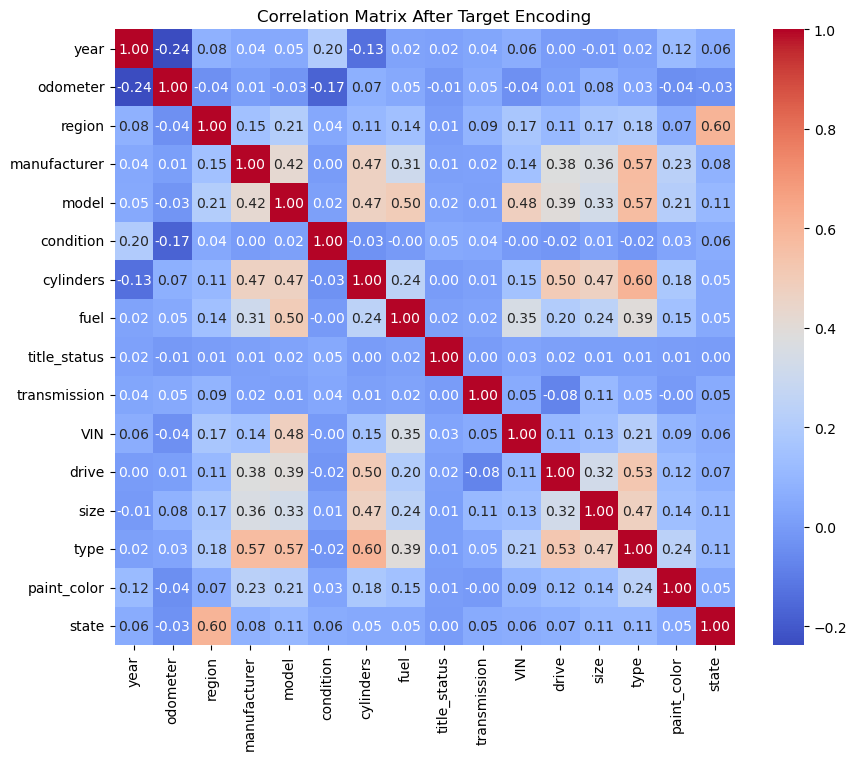

In [79]:
t = Pipeline(steps=[('transformer', transformer)])
X_train_transformed = t.fit_transform(X_train, y_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_features)
corr_matrix = X_train_transformed_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix After Target Encoding')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Vehicle Price Findings Report



This report presents the findings from my analysis aimed at identifying key drivers that affect used car prices. 

Objective: To determine the factors that most significantly influence the prices of used cars.

Methods: Utilization of models including Linear Regression and Ridge to predict car prices based on vehicles dataset.

Data: Dataset containing details about cars such as make, model, year, mileage, condition, and other features.


Data Cleaning: Addressed missing values.

Feature Engineering: Used target encoding to encode categorical values.

Visualizations: Created plots to understand the distribution and relationship of individual features with car prices.


Model Selection: Evaluated two models, Linear Regression andRidge.

Performance Metrics: Used Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) to assess model performance.

Findings and Insights

Key Drivers: The models highlighted several key factors influencing car prices:
The model used for analytics (Ridge) suggests that each additional year (being newer cars) increases the car's value. 

It suggests that higher mileage significantly reduces the car's value.
Recommendations

Inventory Management: It is better to maintain an inventory with more new cars and fewer used cars. When looking to add used cars to your inventory, you should be mindful of adding used cars that have the lowest mileage.